In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
# Load the dataset
df_heart_disease = pd.read_csv('heart_disease_uci.csv')

# Display initial information about the dataset
print("Initial DataFrame Info:")
print(df_heart_disease.info())
print("\nFirst 5 rows of the dataset:")
df_heart_disease.head()

Initial DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None

First 5 rows of the dataset:


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [2]:
df_eda = df_heart_disease.copy()

In [3]:
df_eda['heart_disease_present'] = df_eda['num'].apply(lambda x: 1 if x > 0 else 0)

In [4]:
df_eda.isnull().sum()

id                         0
age                        0
sex                        0
dataset                    0
cp                         0
trestbps                  59
chol                      30
fbs                       90
restecg                    2
thalch                    55
exang                     55
oldpeak                   62
slope                    309
ca                       611
thal                     486
num                        0
heart_disease_present      0
dtype: int64

In [5]:
numerical_cols = ['trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
for col in numerical_cols:
    if df_eda[col].isnull().sum() > 0:
        median_val = df_eda[col].median()
        df_eda[col] = df_eda[col].fillna(median_val)

Correlation Matrix:


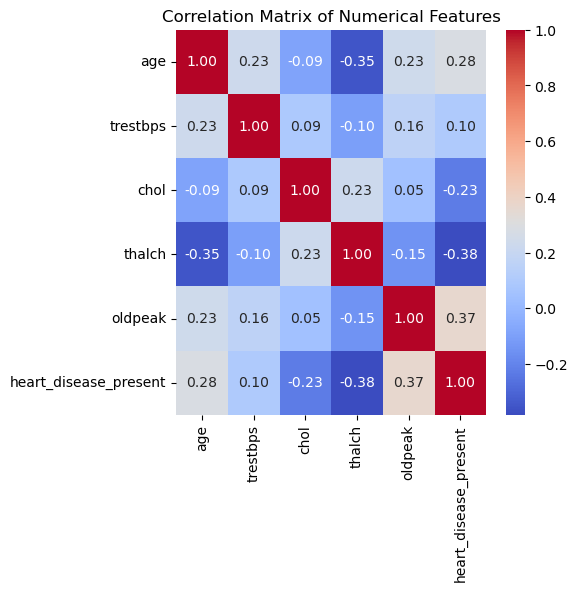

In [6]:
numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'heart_disease_present']

# Calculate the correlation matrix
correlation_matrix = df_eda[numerical_cols].corr()
print("Correlation Matrix:")
#print(correlation_matrix)
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Oldpeak and Talach have strong positive and strong negative correlation to the target variable when compared to other variables. 

In [7]:
categorical_cols = ['fbs', 'restecg', 'exang', 'slope', 'thal']
for col in categorical_cols:
    if df_eda[col].isnull().sum() > 0:
        mode_val = df_eda[col].mode()[0]
        df_eda[col] = df_eda[col].fillna(mode_val)

C:\Users\USER\AppData\Local\Temp\ipykernel_1376\2033526830.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_eda[col] = df_eda[col].fillna(mode_val)


In [8]:
df_eda.isnull().sum()

id                       0
age                      0
sex                      0
dataset                  0
cp                       0
trestbps                 0
chol                     0
fbs                      0
restecg                  0
thalch                   0
exang                    0
oldpeak                  0
slope                    0
ca                       0
thal                     0
num                      0
heart_disease_present    0
dtype: int64

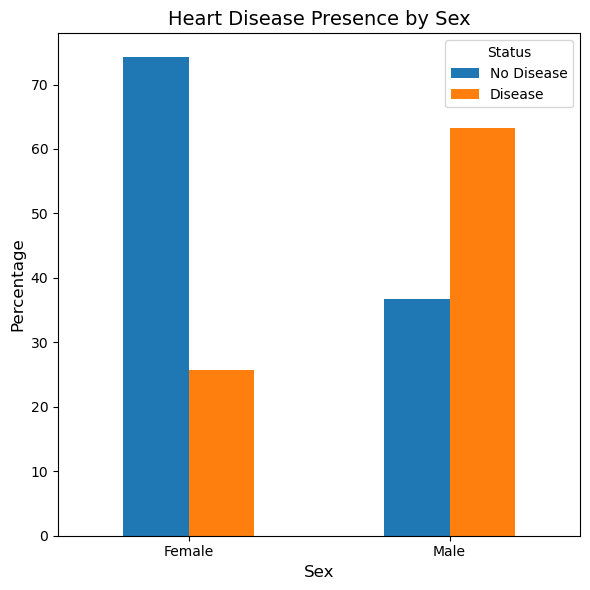

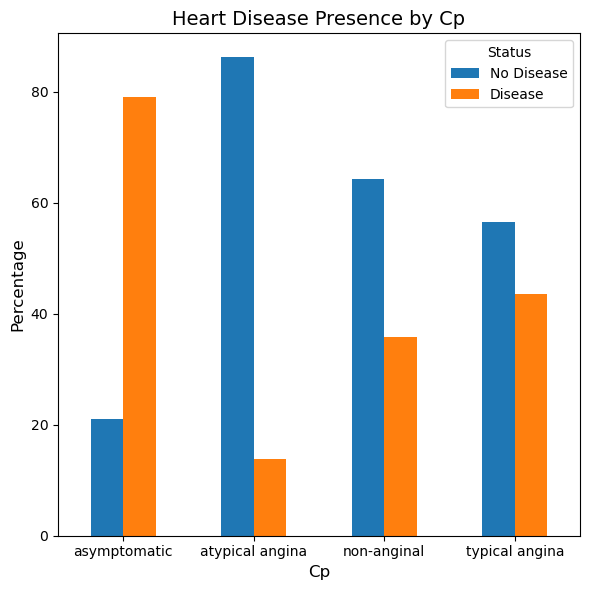

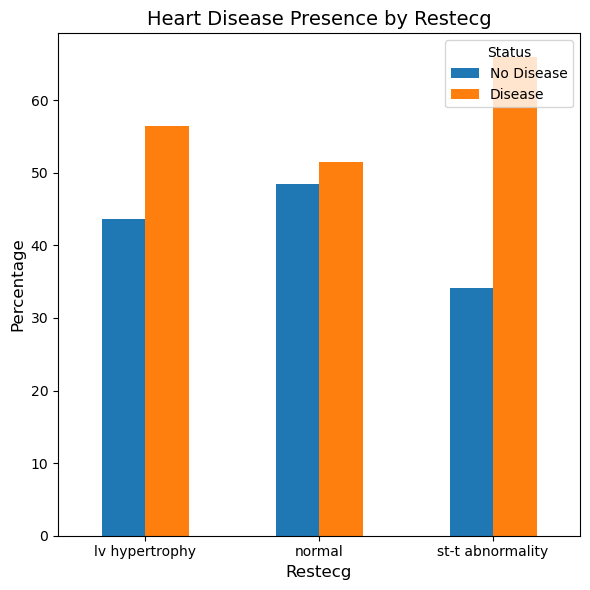

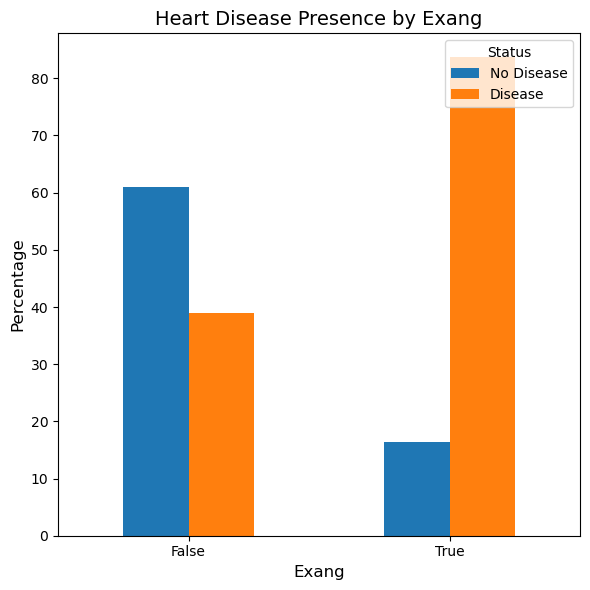

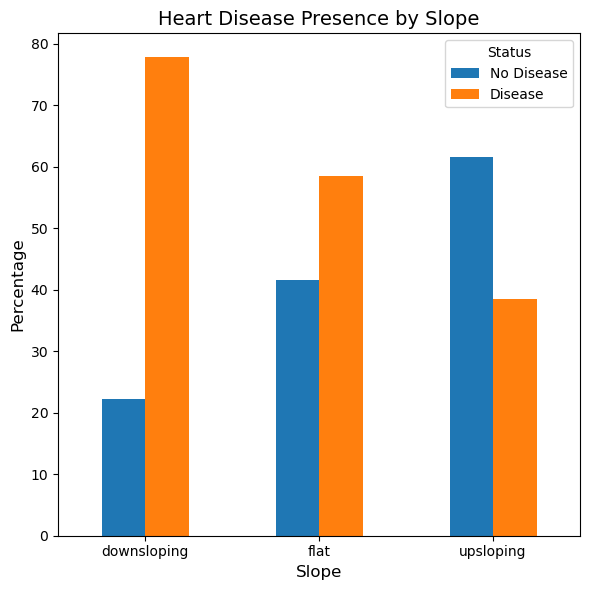

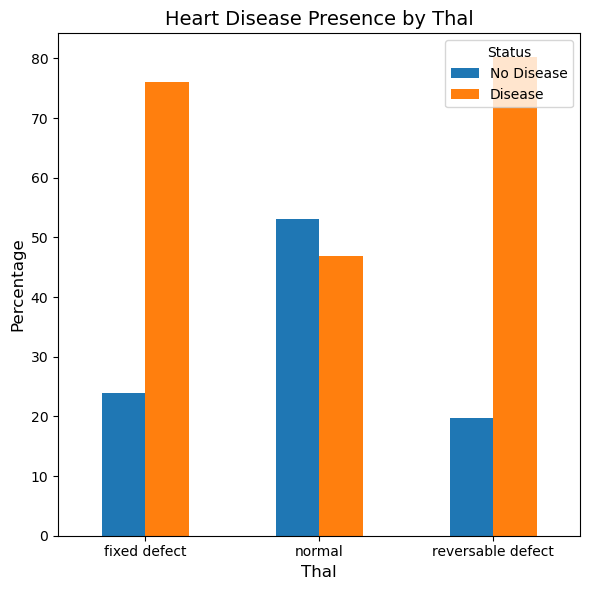

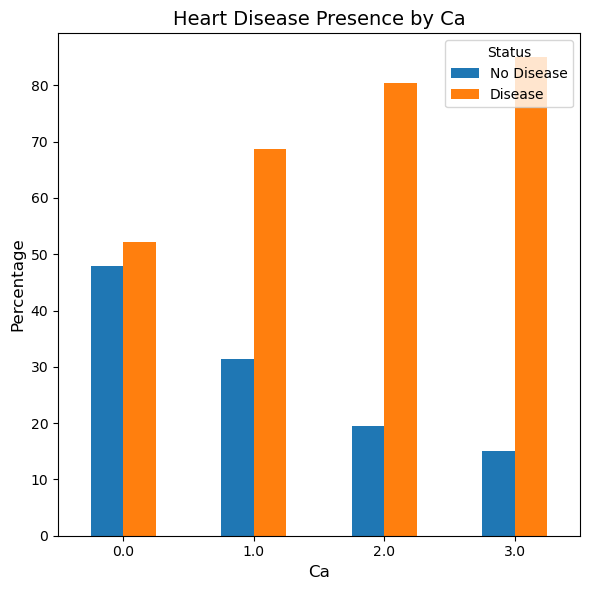

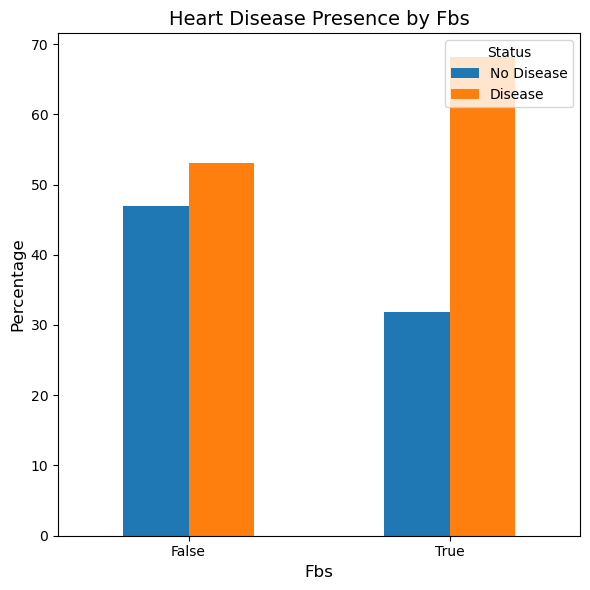

In [9]:
categorical_features = ['sex', 'cp', 'restecg','exang', 'slope', 'thal', 'ca','fbs']

for feature in categorical_features:
    # Create a crosstab for the feature and the target variable.
    cross_tab = pd.crosstab(df_eda[feature], df_eda['heart_disease_present'], normalize='index') * 100

    # Create the plot.
    plt.figure(figsize=(6, 6))
    cross_tab.plot(kind='bar', stacked=False, color=['#1f77b4', '#ff7f0e'], ax=plt.gca())
    plt.title(f'Heart Disease Presence by {feature.capitalize()}', fontsize=14)
    plt.xlabel(f'{feature.capitalize()}', fontsize=12)
    plt.ylabel('Percentage', fontsize=12)
    plt.xticks(rotation=0)
    plt.legend(['No Disease', 'Disease'], title='Status', loc='upper right')
    plt.tight_layout()
    plt.show()

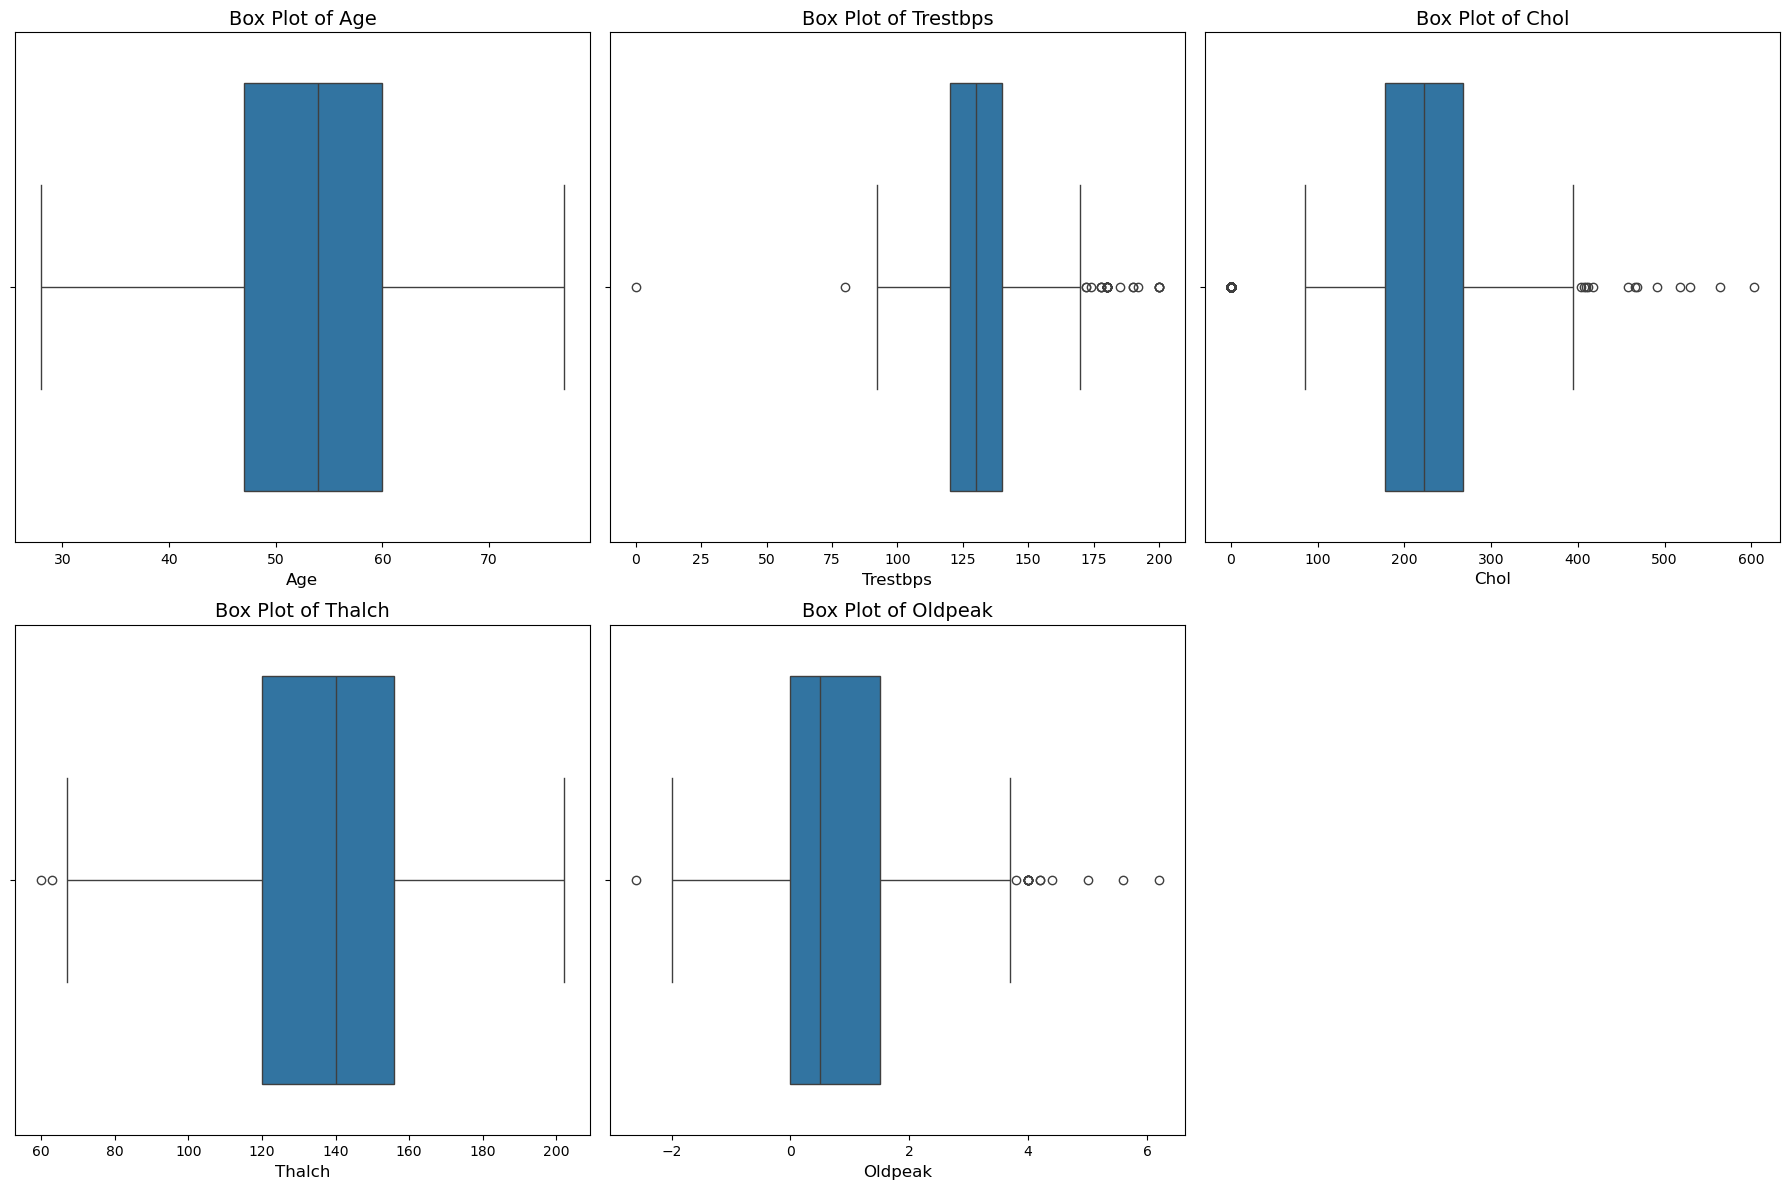

In [10]:
numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

# Create subplots for the box plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.delaxes(axes[1, 2]) # Remove the last subplot as we have only 5 features

for i, feature in enumerate(numerical_features):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.boxplot(x=df_eda[feature], ax=ax)
    ax.set_title(f'Box Plot of {feature.capitalize()}', fontsize=14)
    ax.set_xlabel(f'{feature.capitalize()}', fontsize=12)

plt.tight_layout()
plt.show()

#finding out outliers

In [11]:
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

In [12]:
trestbps_outliers, low_bp, high_bp = find_outliers_iqr(df_eda, 'trestbps')
print("\nTrestbps outliers:\n", trestbps_outliers[['trestbps']])


Trestbps outliers:
      trestbps
14      172.0
83      180.0
126     200.0
172     174.0
183     178.0
188     192.0
201     180.0
213     178.0
231     180.0
338     190.0
375     180.0
387     180.0
475     180.0
484     180.0
548     200.0
569     180.0
595     180.0
644      80.0
647     180.0
680     200.0
700     185.0
701     200.0
727     180.0
753       0.0
779     178.0
854     172.0
889     180.0
896     190.0


In [13]:
chol_outliers, low_chol, high_chol = find_outliers_iqr(df_eda, 'chol')
print("\nCholesterol outliers:\n", chol_outliers[['chol']])

chol_outliers[['chol']].value_counts()


Cholesterol outliers:
       chol
48   417.0
121  407.0
152  564.0
181  409.0
373  412.0
..     ...
818    0.0
819    0.0
822    0.0
839    0.0
840    0.0

[185 rows x 1 columns]


chol 
0.0      172
404.0      1
407.0      1
409.0      1
412.0      1
417.0      1
458.0      1
466.0      1
468.0      1
491.0      1
518.0      1
529.0      1
564.0      1
603.0      1
Name: count, dtype: int64

In [15]:
oldpeak_outliers, low_chol, high_chol = find_outliers_iqr(df_eda, 'oldpeak')
print("\noldpeak_outliers:\n", chol_outliers[['oldpeak']])
chol_outliers[['oldpeak']].value_counts()


oldpeak_outliers:
      oldpeak
48       0.8
121      4.0
152      1.6
181      1.9
373      0.0
..       ...
818      0.5
819      3.0
822      1.0
839      0.5
840      0.5

[185 rows x 1 columns]


oldpeak
 0.0       56
 0.5       22
 2.0       19
 1.0       19
 1.5       14
 3.0        5
 2.5        5
 0.7        4
 1.6        3
 1.3        2
 0.3        2
-1.0        2
 1.4        2
 1.1        2
 1.8        2
-0.5        2
 0.1        2
 0.2        2
-2.6        1
-1.1        1
-1.5        1
-2.0        1
-0.9        1
 0.8        1
 0.9        1
-0.7        1
-0.8        1
-0.1        1
 0.4        1
 1.7        1
 2.1        1
 1.9        1
 2.4        1
 2.2        1
 2.6        1
 2.8        1
 3.7        1
 4.0        1
Name: count, dtype: int64

In [14]:
from sklearn.ensemble import IsolationForest

In [15]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [16]:
df_eda["sex_cp_asymptomatic"] = (df_eda["sex"] == "Male") & (df_eda["cp"] == "asymptomatic")
df_eda["age_oldpeak"] = df_eda["age"] * df_eda["oldpeak"]

In [17]:
numerical_features = ["age_oldpeak", 'oldpeak']
categorical_features = ['sex', 'cp', 'dataset', 'exang', 'ca']

In [18]:
df_eda.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,heart_disease_present,sex_cp_asymptomatic,age_oldpeak
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,0,False,144.9
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,1,True,100.5
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,1,True,174.2
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,0,False,129.5
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,0,False,57.4


In [19]:
df_eda.drop(['id','num','heart_disease_present'], axis = 1, inplace = True)

In [20]:
df_eda.columns

Index(['age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal',
       'sex_cp_asymptomatic', 'age_oldpeak'],
      dtype='object')

In [21]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Fit the preprocessor and transform the data
X_processed = preprocessor.fit_transform(df_eda)

In [22]:
X_processed

array([[ 1.5890939 ,  1.36810909,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.86107607,  0.61158896,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 2.06952008,  1.65180414,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.78680214, -0.80688628,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.31129499, -0.3340612 ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.78680214, -0.80688628,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [32]:
print(X_processed)
contamination_values = [0.01, 0.05, 0.1, 0.125, 0.13,0.15, 0.2, 0.25,0.33, 0.35, 0.5]
print("Tuning the 'contamination' hyperparameter:")

for contamination in contamination_values:
    # Initialize the Isolation Forest model
    model= IsolationForest(contamination=contamination, random_state=42)
    
    # Train the model on the preprocessed data
    model.fit(X_processed)
    
    # Get the outlier labels (-1 for outlier, 1 for inlier)
    outlier_labels= model.predict(X_processed)
    
    num_outliers = len(outlier_labels[outlier_labels == -1])
    print(f"Contamination: {contamination}, Outliers Detected: {num_outliers}")



[[ 1.5890939   1.36810909  0.         ...  0.          0.
   0.        ]
 [ 0.86107607  0.61158896  0.         ...  0.          0.
   1.        ]
 [ 2.06952008  1.65180414  0.         ...  0.          1.
   0.        ]
 ...
 [-0.78680214 -0.80688628  0.         ...  0.          0.
   0.        ]
 [-0.31129499 -0.3340612   0.         ...  0.          0.
   0.        ]
 [-0.78680214 -0.80688628  0.         ...  0.          0.
   0.        ]]
Tuning the 'contamination' hyperparameter:
Contamination: 0.01, Outliers Detected: 10
Contamination: 0.05, Outliers Detected: 46
Contamination: 0.1, Outliers Detected: 92
Contamination: 0.125, Outliers Detected: 112
Contamination: 0.13, Outliers Detected: 120
Contamination: 0.15, Outliers Detected: 138
Contamination: 0.2, Outliers Detected: 184
Contamination: 0.25, Outliers Detected: 230
Contamination: 0.33, Outliers Detected: 303
Contamination: 0.35, Outliers Detected: 322
Contamination: 0.5, Outliers Detected: 460


In [30]:
best_contamination = 0.125
final_model = IsolationForest(contamination=best_contamination, random_state=42)
final_model.fit(X_processed)

anomaly_scores = final_model.decision_function(X_processed)
outlier_labels = final_model.predict(X_processed)
df_eda['outlier_label'] = outlier_labels
df_eda['outlier_score'] = anomaly_scores

In [31]:
df_eda['outlier_label'].value_counts()

outlier_label
 1    808
-1    112
Name: count, dtype: int64

In [27]:
def plot_outlier_scatter(df, pairs, hue_col='outlier_label', palette={1:'blue', -1:'red'}):
    for x, y in pairs:
        plt.figure(figsize=(5,5))
        sns.scatterplot(data=df, x=x, y=y, hue=hue_col, palette=palette, s=35, edgecolor=None)
        plt.title(f'Outliers Detected by Isolation Forest ({x} vs {y})')
        plt.xlabel(x); plt.ylabel(y)
        # Optional: nicer legend labels
        handles, labels = plt.gca().get_legend_handles_labels()
        label_map = {'1':'Inlier','-1':'Outlier'}  # because your mapping is {1:blue (inlier), -1:red (outlier)}
        labels = [label_map.get(l, l) for l in labels]
        plt.legend(handles, labels, title='Category')
        plt.tight_layout()
        plt.show()



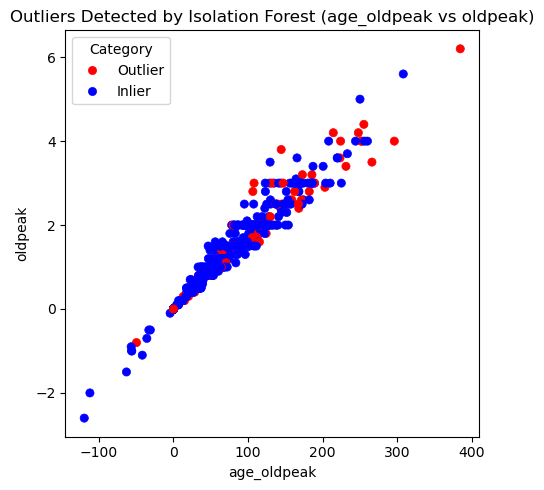

In [28]:
from itertools import combinations

num_cols = ["age_oldpeak", 'oldpeak'] # adjust if needed

all_pairs = list(combinations(num_cols, 2))
plot_outlier_scatter(df_eda, all_pairs)

In [29]:
#df_eda["is_outlier"] = (df_eda["outlier_label"] == -1).astype(int)
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
def heatmap_pairwise_outlier_rate(df, cat_cols, max_pairs=10):
    # Ensure we have a binary 0/1 flag for outliers
    if "is_outlier" not in df.columns:
        df["is_outlier"] = (df["outlier_label"] == -1).astype(int)

    pairs = list(combinations(cat_cols, 2))[:max_pairs]
    
    for a, b in pairs:
        # Pivot table with outlier rates
        pivot = df.pivot_table(values="is_outlier", index=a, columns=b, aggfunc="mean")
        annot = (pivot * 100).round(1).astype(str) + "%"
        
        plt.figure(figsize=(1.2*len(pivot.columns)+4, 1.0*len(pivot.index)+3))
        ax = sns.heatmap(
            pivot, annot=annot, fmt="", cmap="Reds",
            cbar_kws={"label": "Outlier rate"}
        )
        ax.set_title(f"Outlier Rate by {a} × {b}")
        ax.set_xlabel(b); ax.set_ylabel(a)
        plt.tight_layout()
        plt.show()


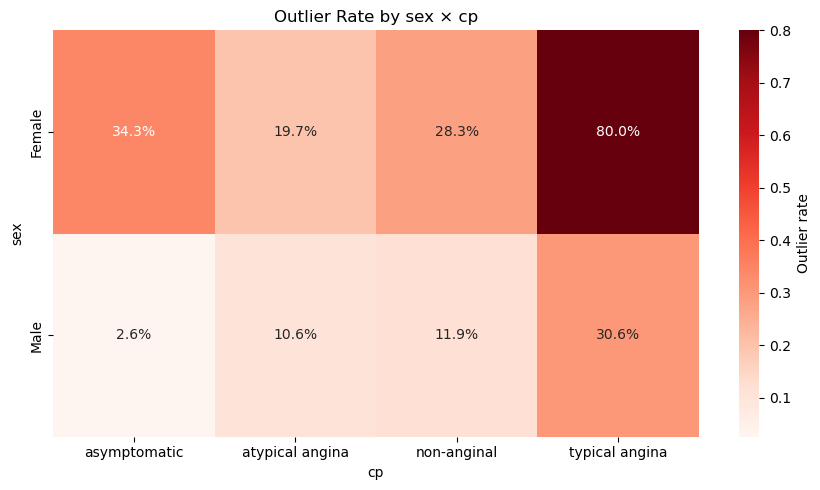

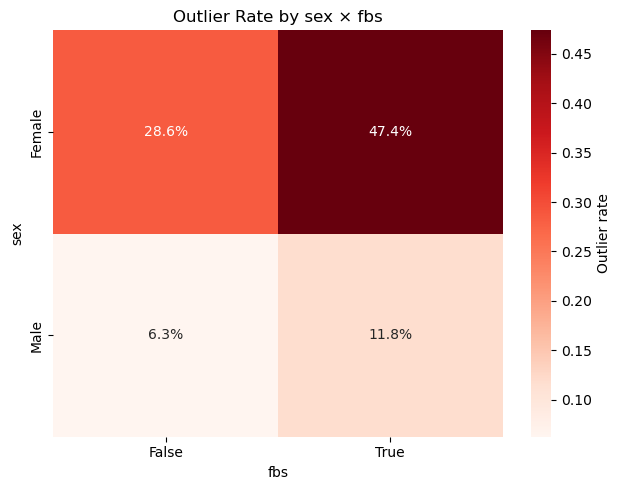

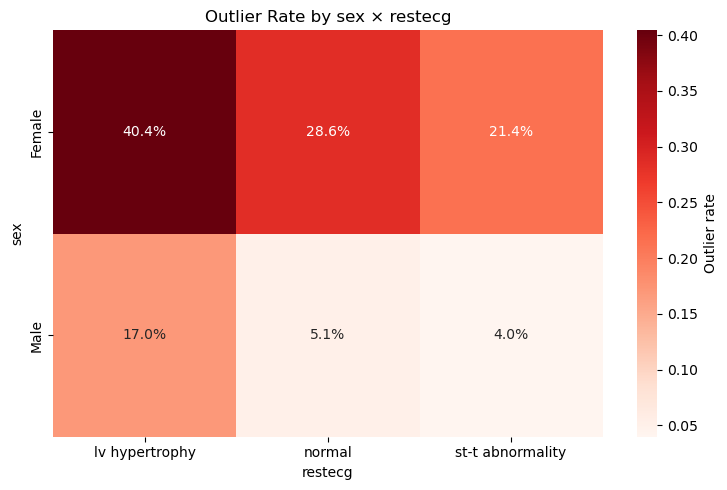

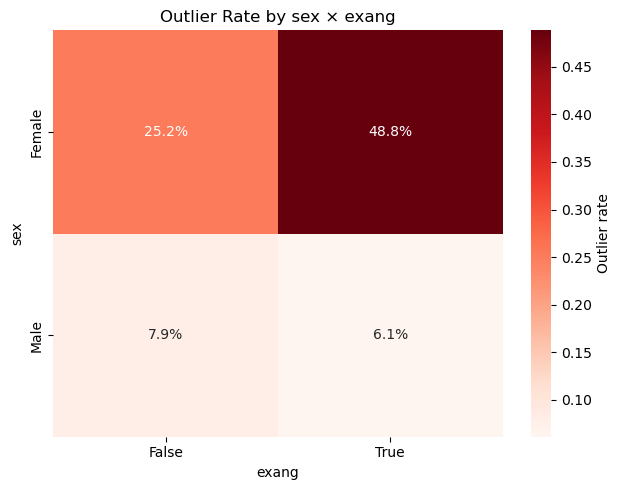

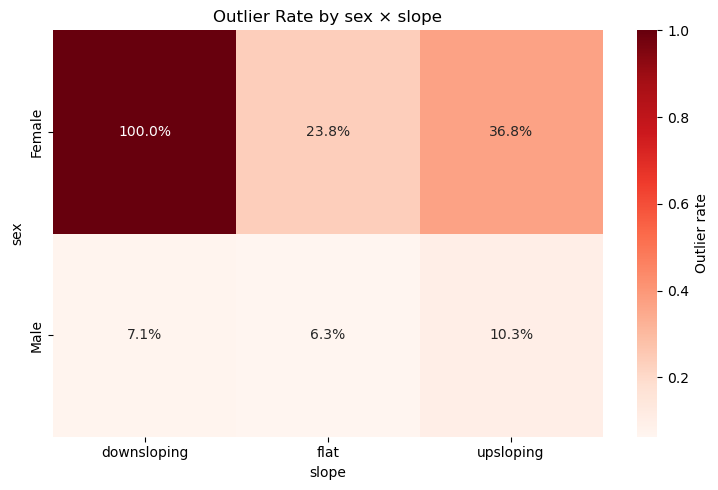

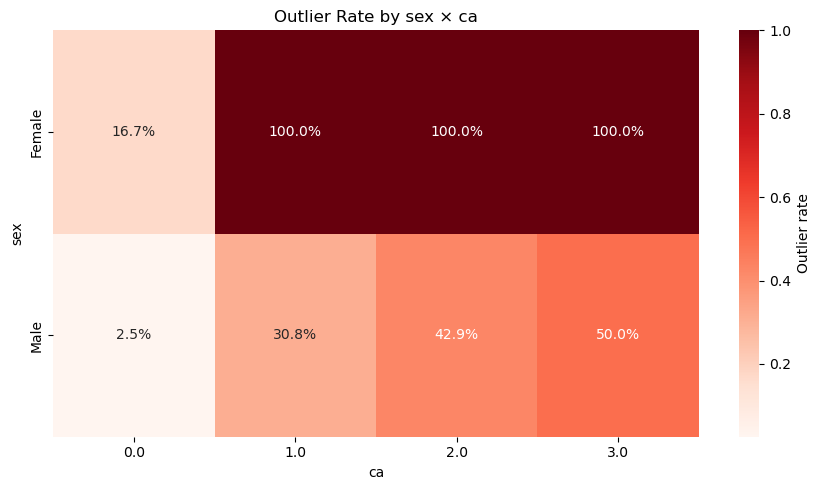

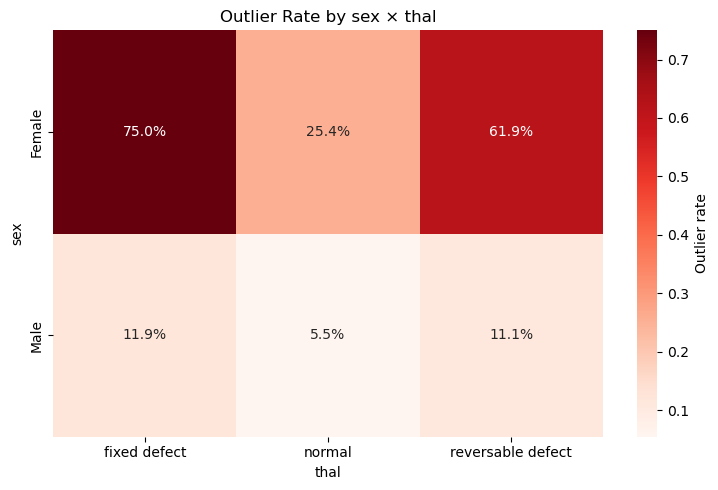

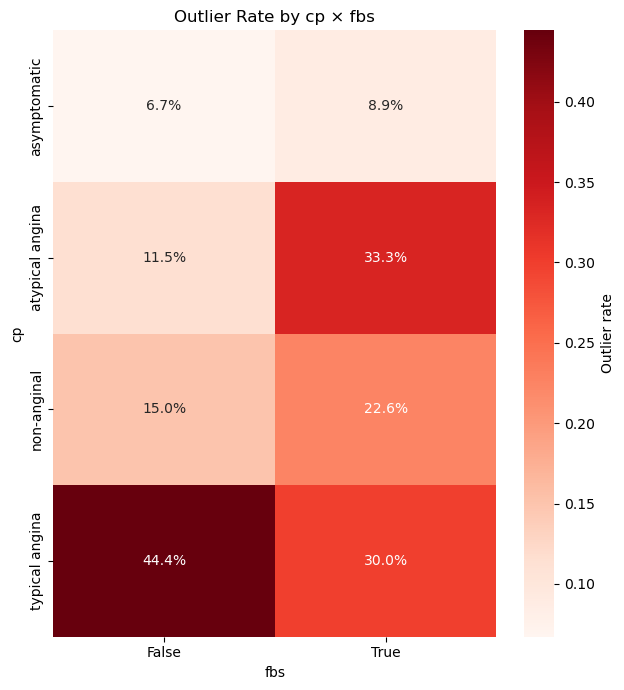

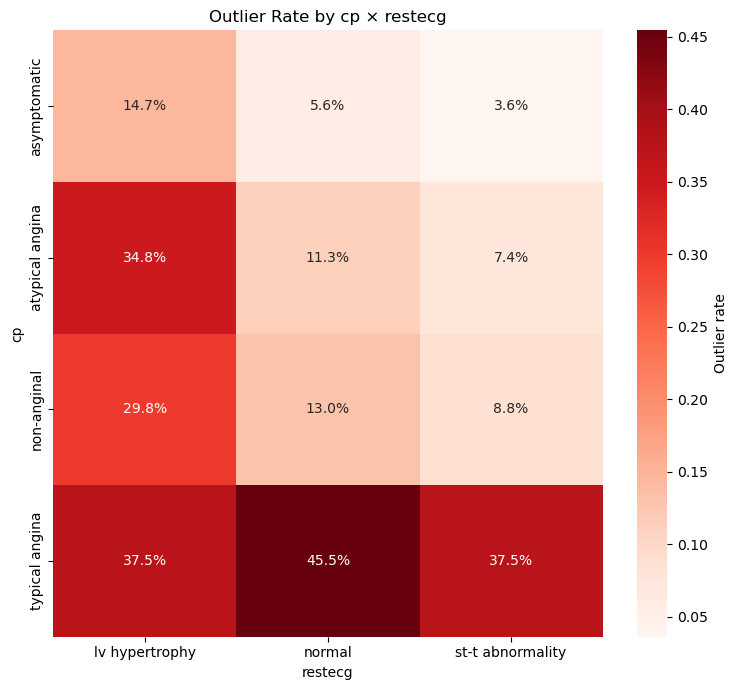

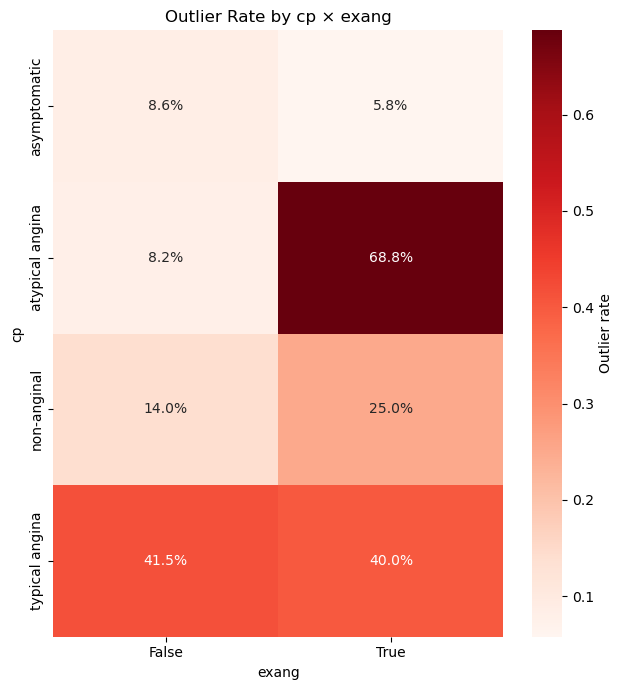

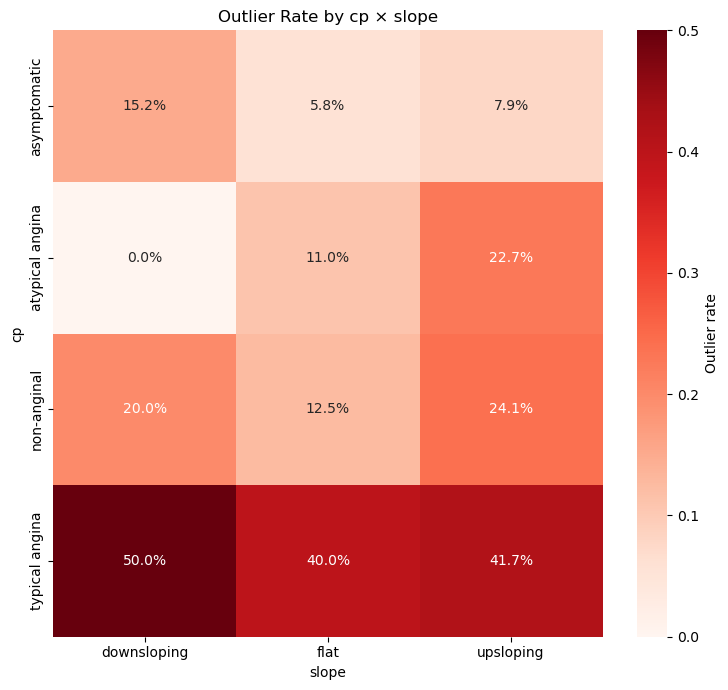

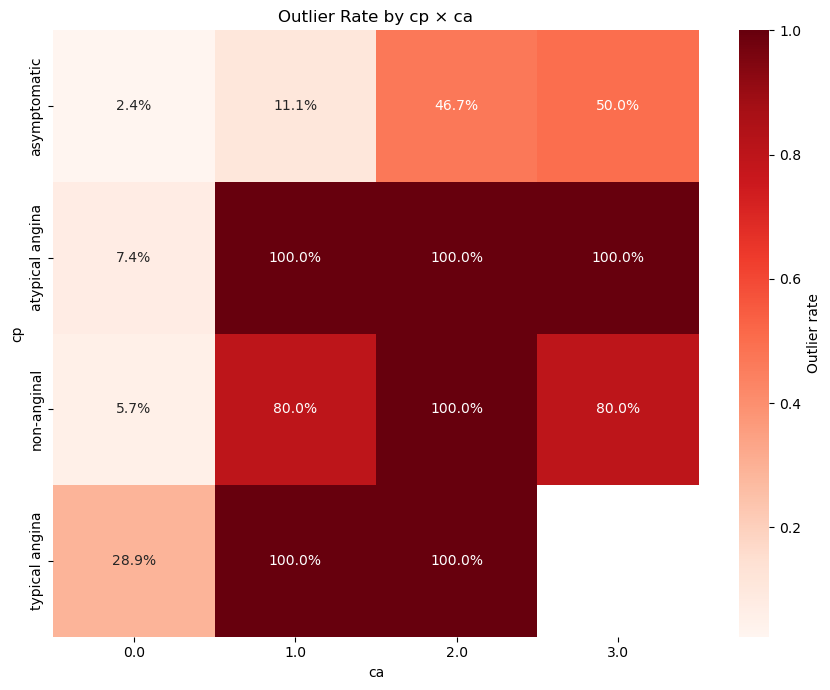

In [30]:
heatmap_pairwise_outlier_rate(df_eda, cat_cols, max_pairs=12)

In [31]:
df_eda.iloc[[48, 152,181, 373, 434]]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,...,slope,ca,thal,num,heart_disease_present,sex_cp_asymptomatic,age_oldpeak,outlier_label,outlier_score,is_outlier
48,49,65,Female,Cleveland,non-anginal,140.0,417.0,True,lv hypertrophy,157.0,...,upsloping,1.0,normal,0,0,False,52.0,-1,-0.051474,1
152,153,67,Female,Cleveland,non-anginal,115.0,564.0,False,lv hypertrophy,160.0,...,flat,0.0,reversable defect,0,0,False,107.2,1,0.016819,0
181,182,56,Female,Cleveland,asymptomatic,134.0,409.0,False,lv hypertrophy,150.0,...,flat,2.0,reversable defect,2,1,False,106.4,-1,-0.044452,1
373,374,44,Male,Hungary,asymptomatic,150.0,412.0,False,normal,170.0,...,flat,0.0,normal,0,0,True,0.0,1,0.130447,0
434,435,53,Female,Hungary,atypical angina,113.0,468.0,False,normal,127.0,...,flat,0.0,normal,0,0,False,0.0,1,0.100974,0


In [32]:
df_eda[df_eda['outlier_label'] == -1]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,...,slope,ca,thal,num,heart_disease_present,sex_cp_asymptomatic,age_oldpeak,outlier_label,outlier_score,is_outlier
6,7,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,...,downsloping,2.0,normal,3,1,False,223.2,-1,-0.062641,1
12,13,56,Male,Cleveland,non-anginal,130.0,256.0,True,lv hypertrophy,142.0,...,flat,1.0,fixed defect,2,1,False,33.6,-1,-0.047324,1
23,24,58,Male,Cleveland,non-anginal,132.0,224.0,False,lv hypertrophy,173.0,...,upsloping,2.0,reversable defect,3,1,False,185.6,-1,-0.050177,1
27,28,66,Female,Cleveland,typical angina,150.0,226.0,False,normal,114.0,...,downsloping,0.0,normal,0,0,False,171.6,-1,-0.039204,1
30,31,69,Female,Cleveland,typical angina,140.0,239.0,False,normal,151.0,...,upsloping,2.0,normal,0,0,False,124.2,-1,-0.087705,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,842,74,Male,VA Long Beach,asymptomatic,150.0,258.0,True,st-t abnormality,130.0,...,downsloping,0.0,normal,3,1,True,296.0,-1,-0.006165,1
845,846,76,Male,VA Long Beach,non-anginal,104.0,223.0,False,lv hypertrophy,120.0,...,downsloping,0.0,normal,4,1,False,266.0,-1,-0.033377,1
846,847,54,Female,VA Long Beach,asymptomatic,138.0,274.0,False,normal,105.0,...,flat,0.0,normal,1,1,False,81.0,-1,-0.005821,1
848,849,61,Female,VA Long Beach,atypical angina,140.0,298.0,True,normal,120.0,...,flat,0.0,reversable defect,0,0,False,0.0,-1,-0.078629,1


In [33]:
df_eda.groupby(['heart_disease_present','outlier_label']).count()['id']

heart_disease_present  outlier_label
0                      -1                45
                        1               366
1                      -1                66
                        1               443
Name: id, dtype: int64

In [34]:
df_eda['heart_disease_present'].value_counts()

heart_disease_present
1    509
0    411
Name: count, dtype: int64

**UNSUPERVISED APPROACH**


In [35]:
import numpy as np
from scipy.stats import kendalltau
from sklearn.base import clone
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [36]:
numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [37]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)


In [38]:
df_eda_2

NameError: name 'df_eda_2' is not defined

In [ ]:
preprocessor_2 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', ohe, categorical_features),
    ],
    remainder='drop'
)


In [ ]:
X_processed_2 = preprocessor_2.fit_transform(df_eda_2)

In [ ]:
X_processed = preprocessor_2.fit_transform(df_eda_2)
X_dense = X_processed.toarray() if hasattr(X_processed, "toarray") else X_processed

In [ ]:
def kendall_rank_stability(estimator, X, n_resamples=5, subsample=0.8, rng=42):
    n = X.shape[0]
    if n < 5:
        return 0.0
    rng = np.random.RandomState(rng)
    ranks = []

    for _ in range(n_resamples):
        idx = rng.choice(n, max(3, int(subsample * n)), replace=False)
        est = clone(estimator).fit(X[idx])
        # IF: higher = more normal, so invert for "anomalousness"
        scores = -est.decision_function(X)

        # guard constant scores (no variability -> undefined tau)
        if np.allclose(scores, scores[0]):
            return 0.0

        order = np.argsort(scores)          # ascending
        rank = np.empty_like(order)
        rank[order] = np.arange(len(scores))
        ranks.append(rank)

    taus = []
    for i in range(len(ranks)):
        for j in range(i+1, len(ranks)):
            tau = kendalltau(ranks[i], ranks[j], nan_policy='omit').correlation
            if np.isfinite(tau):
                taus.append(tau)

    return float(np.mean(taus)) if taus else 0.0

In [ ]:
def stability_scorer(estimator, X, y=None):
    return kendall_rank_stability(estimator, X, n_resamples=5, subsample=0.8, rng=42)


In [ ]:
param_grid = {
    "n_estimators": [300, 400],
    "max_samples": ["auto", 0.7, 1.0],
    "max_features": [0.5, 0.75, 1.0],
    "contamination": [0.01, 0.05, 0.1, 0.125, 0.15, 0.2],
}


In [ ]:
n = X_dense.shape[0]
full_idx = np.arange(n)
cv_full = [(full_idx, full_idx)]


In [ ]:
grid = GridSearchCV(
    estimator=IsolationForest(random_state=42),
    param_grid=param_grid,
    scoring=stability_scorer,   # <-- direct callable
    cv=cv_full,
    n_jobs=-1,
    verbose=1,
    error_score='raise',        # <-- enable for one run to surface issues
)


In [ ]:
grid.fit(X_dense)

In [ ]:
print("Best params:", grid.best_params_)
print("Best stability (mean Kendall τ):", grid.best_score_)

best_iforest = grid.best_estimator_

In [ ]:
best_iforest = grid.best_estimator_
best_iforest.fit(X_dense)
df_eda_2['outlier_score'] = best_iforest.decision_function(X_dense)
df_eda_2['outlier_label'] = best_iforest.predict(X_dense)

In [ ]:


sns.scatterplot(data=df_eda_2, x="chol", y="thalch", hue="outlier_label",
                palette={1:"C0",-1:"C3"}, alpha=0.8)
plt.title("Isolation Forest outliers: chol vs thalch"); plt.show()

sns.scatterplot(data=df_eda_2, x="chol", y="trestbps", hue="outlier_label",
                palette={1:"C0",-1:"C3"}, alpha=0.8)
plt.title("Isolation Forest outliers: chol vs trestbps"); 
plt.show()

In [ ]:
df_eda_2['outlier_label'].value_counts()